### AcO_M1Pos_FEM_cl_seg1-6_mount

In [ ]:
import dos
from IPython.display import Image
path = './dos/Integrated'

In [ ]:
# init
sim = dos.DOS(path, 20, show_timing = 2)
Image(filename=path + '/timing.png')

In [ ]:
sim.start()

In [ ]:
sim.pctComplete

In [ ]:
sim.join()
sim.terminate()

logs = sim.logs.entries

In [19]:
# Save
import pickle

"""
with open('./logs/Integrated.sclogs', 'wb') as f:
    pickle.dump(sim.logs.entries, f)
    logs = sim.logs.entries
"""
"""
# Load
logs = pickle.load( open( './logs/Integrated.sclogs', "rb" ) )
""";

# plot logs
---

In [20]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np

try:
    duration = sim.cfg['simulation']['duration']
except NameError:
    duration = logs['FEM']['OSS_AzDrive_D'].timeSeries[0][-1]
    
xticks = np.arange(0, duration + 1, duration/ 10)

logs

{'wfs48': {'M12_RBM': <dos.dos.Entry at 0x7f0a5a397f50>},
 'AcO_controller': {'M1 TxyzRxyz': <dos.dos.Entry at 0x7f0a55cf0310>,
  'M2 Txyz': <dos.dos.Entry at 0x7f0a55cf0790>,
  'M2 Rxyz': <dos.dos.Entry at 0x7f0a55cf0c10>,
  'M1 BM': <dos.dos.Entry at 0x7f0a55cf70d0>},
 'M1Pos0': {'M1Pos_DeltaF': <dos.dos.Entry at 0x7f0a55cf7590>},
 'Mount': {'Mount_AzDrive_F': <dos.dos.Entry at 0x7f0a477992d0>,
  'Mount_ElDrive_F': <dos.dos.Entry at 0x7f0a386e70d0>,
  'Mount_GIRDrive_F': <dos.dos.Entry at 0x7f0a25baee50>},
 'FEM': {'OSS_AzDrive_D': <dos.dos.Entry at 0x7f0a1d41ac90>,
  'OSS_ElDrive_D': <dos.dos.Entry at 0x7f0a2ab24a90>,
  'OSS_GIRDrive_D': <dos.dos.Entry at 0x7f0a0732a890>,
  'OSS_Hardpoint_D': <dos.dos.Entry at 0x7f09feb95690>,
  'Bending Modes': <dos.dos.Entry at 0x7f09f7b91490>,
  'OSS_M1_Translation': <dos.dos.Entry at 0x7f09f06e2390>,
  'OSS_M1_Rotation': <dos.dos.Entry at 0x7f0a0fb622d0>},
 'M1HPloadcells0': {'M1_HP_F_meas': <dos.dos.Entry at 0x7f0812bf8250>}}

In [ ]:
time_1 = logs['FEM']['OSS_AzDrive_D'].timeSeries[0]
time_2000 = logs['wfs48']['M12_RBM'].timeSeries[0]
time_50000 = logs['AcO_controller']['M1 BM'].timeSeries[0]

AcO_ref = logs['AcO_controller']['M1 TxyzRxyz'].timeSeries[1]
FEM_Txyz = logs['FEM']['OSS_M1_Translation'].timeSeries[1]
FEM_Rxyz = logs['FEM']['OSS_M1_Rotation'].timeSeries[1]

Mount_Az = logs['Mount']['Mount_AzDrive_F'].timeSeries[1]
Mount_El = logs['Mount']['Mount_ElDrive_F'].timeSeries[1]
Mount_GIR = logs['Mount']['Mount_GIRDrive_F'].timeSeries[1]

FEM_Az = logs['FEM']['OSS_AzDrive_D'].timeSeries[1]
FEM_El = logs['FEM']['OSS_ElDrive_D'].timeSeries[1]
FEM_GIR = logs['FEM']['OSS_GIRDrive_D'].timeSeries[1]

HP_F = logs['M1Pos0']['M1Pos_DeltaF'].timeSeries[1]

In [ ]:
seg = list(range(7))
TRxyz = list(range(6))
rbm_str = ['Tx','Ty','Tz','Rx','Ry','Rz']
for s in seg:
    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(12,15))
    fig.suptitle('Seg'  + str(s + 1), fontsize=12, horizontalalignment = 'center',
                verticalalignment = 'top')
    for rbm in TRxyz:
        ax[rbm].plot(time_1[::20000], AcO_ref[s,rbm,:], label = 'AcO')
        #ax[rbm].plot(time_1, FEM_out[:,s * 6  + rbm], label = 'FEM')
        if rbm <3:
            ax[rbm].plot(time_1, FEM_Txyz[s,rbm, :], label = 'FEM')
        else:
            ax[rbm].plot(time_1, FEM_Txyz[s,rbm - 3, :], label = 'FEM')
        ax[rbm].set_xticks(xticks)
        ax[rbm].set_title(rbm_str[rbm])
        ax[rbm].legend(loc="best")
    plt.show()

In [ ]:
seg = list(range(7))
hp_ = list(range(6))
for s in seg:
    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(12,15))
    fig.suptitle('Seg'  + str(s + 1), fontsize=12, horizontalalignment = 'center',
                verticalalignment = 'top')
    for hp in hp_:
        ax[hp].plot(time_1, HP_F[:,s * 6  + hp])
        ax[hp].set_xticks(xticks)
        ax[hp].set_title(f'Hardpoint {hp + 1} Delta F')
        #ax[hp].legend(loc="best")
    plt.show()

In [ ]:
wfs = logs['wfs48']['M12_RBM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(wfs)
plt.show()

In [ ]:
fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Mount Azimuth Forces', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_Az[:,m])
plt.show()

fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Mount Elevation Forces', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_El[:,m])
plt.show()

fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,6))
fig.suptitle('Mount GIR Forces', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(4):
    ax[m%2,m//2].plot(time_1,Mount_GIR[:,m])
plt.show()


fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('FEM Azimuth', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,FEM_Az[:,m])
plt.show()

fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('FEM Elevation', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,FEM_El[:,m])
plt.show()

fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,6))
fig.suptitle('FEM GIR', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(4):
    ax[m%2,m//2].plot(time_1,FEM_GIR[:,m])
plt.show()

### Bending Modes
---

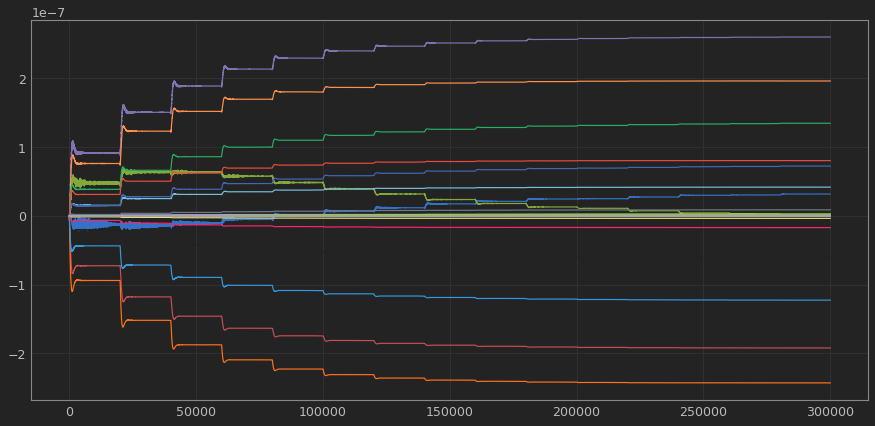

In [44]:
BM = logs['FEM']['Bending Modes'].timeSeries[1].T

plt.figure(figsize = (15,7))
plt.plot(BM[:,:,0])
plt.show()

In [38]:
import scipy.io as sio
transformation_path = '../database/bendingmodes/AllResidualSoftDrive_SSBM_transformation_matrices.mat'
Q_seg = np.squeeze(sio.loadmat(transformation_path)['Q_incell'])
U_seg = np.squeeze(sio.loadmat(transformation_path)['U_incell'])

In [69]:
import importlib
import utils
try:
    importlib.reload(utils)
except:
    pass
from utils import LargeCompute

lc = LargeCompute(onCuda = True)

In [ ]:
disp_ptt_ = lc.load_disp('variables/states.dat', './dos/Integrated', int(duration) )

indx = [x*742 for x in range(1,7)]
disp_ptt = np.array(np.split(disp_ptt_, indices_or_sections = indx, axis = 0),
                     dtype = object)

/home/felipe/anaconda3/lib/python3.7/site-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [41]:
disp = np.empty(7, dtype = object)
ptt = np.empty(7, dtype = object)
for i in range(7):
    disp[i], ptt[i] = lc.remove_ptt(Q_seg[i], disp_ptt[i])

In [59]:
rec_disp = np.empty(7, dtype = object)
for i in range(7):
    rec_disp[i] = lc.bm_to_disp_time(U_seg[i][:,0:27] ,BM[:,:,i].T)

In [62]:
rec_disp[0].shape

(742, 300001)

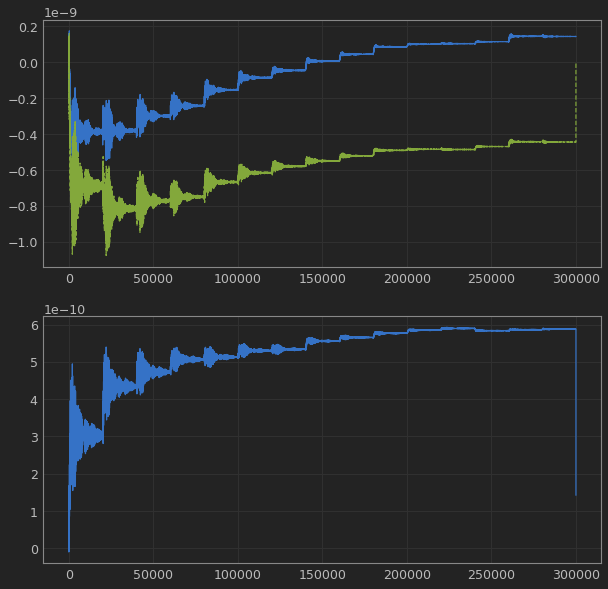

In [68]:
plt.figure(figsize = (10,10))
plt.subplot(211)
plt.plot(rec_disp[5][200,:])
plt.plot(disp[5][200,:], '--')
plt.subplot(212)
plt.plot(rec_disp[5][200,:] - disp[5][200,:])
plt.show()

In [7]:
import yaml
import scipy.io as sio
import numpy as np
with open(dos_path + r'/FEM.yaml') as file:
    cfg = yaml.load(file, Loader=yaml.FullLoader)
fem_ss = cfg['FEM']['build']['state_space_filename']
fem_io = cfg['FEM']['build']['fem_io_filename']

C = sio.loadmat(fem_ss)['C']
shape_st_ = (C.shape[1],duration*2000+1)
states = np.memmap(states_path, dtype=np.float32, mode='r+', shape=shape_st_)

data = sio.loadmat(fem_io)
fem_outputs=[(x[0][0],y[0]) for x,y in zip(data['FEM_IO']['outputs_name'][0,0],
                                        data['FEM_IO']['outputs_size'][0][0])]

i_sum = 0
i_, ii_ = 0, 0
for k in fem_outputs:
    if k[0] != 'M1_surfaces_d':
        i_sum += k[1]
    else:
        ref_size = k[1]
        i_, ii_ = i_sum, i_sum + ref_size
C = C[i_:ii_,:]
indexes = range(2,C.shape[0],3)
C = C[indexes, :]

/home/felipe/anaconda3/lib/python3.7/site-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [ ]:
displacements_ptt[:,:] = np.dot(C, states)

In [ ]:
indc1 = [x*742 for x in range(1,7)]
seg_displacements_ptt_ = np.split(displacements_ptt,
                                             indices_or_sections = indc1,
                                             axis = 0)

In [ ]:
disp_ptt = bm_utils.load_displacements('variables/states.dat',
                                       './dos/Integrated',
                                       int(duration))

/home/felipe/anaconda3/lib/python3.7/site-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [ ]:
fig, ax = plt.subplots(1,2, figsize = (20, 8))
ax1, ax2 = ax
bm_utils.plot_surf(rec_disp, 0, 300000, ax = ax1)
bm_utils.plot_surf(rec_disp, 0, 25000, ax = ax2)